<a href="https://colab.research.google.com/github/Massittha/Data-portfolio/blob/main/hw01_rock_paper_scissors_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW01 Rock Paper Scissor game

This python notebook includes user-defined functions I used to create a mini Rock Paper Scissor game with some visualisation of the game result.

Run all the cell and use the function `rpsgame()` to start the game

Please read the instructions as you go along and feel free to play the game.

Welcome to Rock paper Scissors game!
Type "quit" any time you want to quit the game.

Mode selection: 
Please type "i" for infinite loop mode or a number for a fixed number of rounds: 3
 You have 3 rounds to go: 
Please press 1 for Rock, 2 for Paper, or 3 for Scissors
: 1


,you,bot,outcome
round,,,
1,Rock,Scissors,You win


 You have 2 rounds to go: 
Please press 1 for Rock, 2 for Paper, or 3 for Scissors
: 2


,you,bot,outcome
round,,,
1,Rock,Scissors,You win
2,Paper,Scissors,Bot wins


 You have 1 rounds to go: 
Please press 1 for Rock, 2 for Paper, or 3 for Scissors
: 1


,you,bot,outcome
round,,,
1,Rock,Scissors,You win
2,Paper,Scissors,Bot wins
3,Rock,Paper,Bot wins


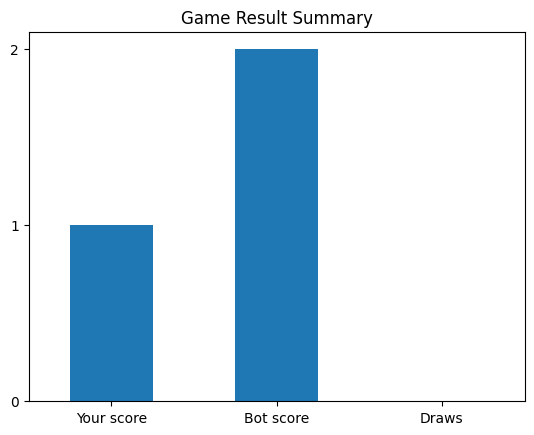


You Lose!

Your score: 1
Bot score: 2
Draws: 0


,you,bot,outcome
round,,,
1,Rock,Scissors,You win
2,Paper,Scissors,Bot wins
3,Rock,Paper,Bot wins


In [ ]:
rpsgame()

In [ ]:
## rock paper scissor game

def number_input(message,exceptionlist,warn = "Please enter a number above 0!"):
    while True:
        value = input(message)
        if value.isnumeric() and int(value) > 0:
            return int(value)
        elif value.lower() in exceptionlist:
            return value.lower()
        else:
            print(warn)

def player_choice():
    while True:
        choice = number_input("Please press 1 for Rock, 2 for Paper, or 3 for Scissors\n: ",\
         ["quit"],"That's not in the options")
        if choice in range(1,4) or choice == "quit":
            return choice


def select_mode():
    print("Mode selection: ")
    return number_input("Please type \"i\" for infinite loop mode or a number for a fixed number of rounds: ",\
     ["quit","i"],"Please enter a valid input")

def game_result(player,bot):
    result = player - bot

    if result == 0:
        outcome = "Draw"

    elif (result == -1 or result == 2):
        outcome = "Bot wins"

    else:
        outcome = "You win"

    return outcome


def plot_result(result):
    import pandas as pd
    from matplotlib import pyplot as plt
    from matplotlib.ticker import MaxNLocator

    result_table = pd.DataFrame({"Counts": result},\
                                    index = ["Your score","Bot score","Draws"])

    chart = result_table.plot(kind='bar',legend=None)
    chart.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.title("Game Result Summary")
    plt.show()






In [ ]:
def rpsgame():
    import pandas as pd
    from random import randint

    abort = False
    quit = False
    infinite_mode = False

    rps = {1: "Rock",
           2: "Paper",
           3: "Scissors"
       }


    columns = {
            "round": [],
            "you" : [],
            "bot" : [],
            "outcome" : []
        }

    df = pd.DataFrame(columns).set_index("round")

    #Greeting message

    print("Welcome to Rock paper Scissors game!\nType \"quit\" any time you want to quit the game.\n")


    # Mode selection
    mode = select_mode()

    # if the user quits the game before playing
    if mode == "quit":
        abort = True
        print("Game aborted!")

    # if

    elif mode == "i":
        infinite_mode = True
        while infinite_mode:
            player = player_choice()
            if player == "quit":
                quit = True
                break
            bot = randint(1,3)
            result_row = [rps[player],rps[bot],game_result(player,bot)]
            df.loc[len(df.index)+1] = result_row
            display(df)

    else:

        rounds = mode
        for round in range(rounds,0,-1):
            print(f" You have {round} rounds to go: ")

            player = player_choice()
            if player == "quit":
                quit = True
                break
            bot = randint(1,3)


            result_row = [rps[player],rps[bot],game_result(player,bot)]


            df.loc[len(df.index)+1] = result_row
            display(df)



    if abort:
        pass

    else:
        try:
            playerwins = df.outcome.value_counts()["You win"]
        except KeyError:
            playerwins = 0

        try:
            botwins = df.outcome.value_counts()["Bot wins"]
        except KeyError:
            botwins = 0

        try:
            draws = df.outcome.value_counts()["Draw"]
        except KeyError:
            draws = 0


        result = [playerwins,botwins,draws]

        plot_result(result)


        if (quit and not infinite_mode):
            finaloutcome = "\nGame over! You quit!\n"
        elif playerwins + botwins + draws == 0:
            finaloutcome = "\nYou haven't played any round\n"
        elif playerwins == botwins:
            finaloutcome = "\nDraw!\n"
        elif playerwins > botwins:
            finaloutcome = "\nCongratulations! You win\n"
        else:
            finaloutcome = "\nYou Lose!\n"


        print(finaloutcome)
        print(f"Your score: {playerwins}")
        print(f"Bot score: {botwins}")
        print(f"Draws: {draws}")


        return df

